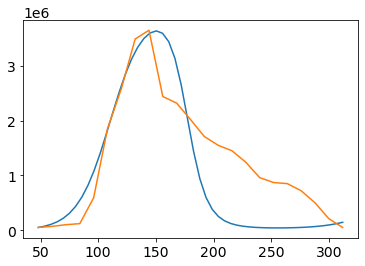

In [23]:
#modeling the growth dynamics of A20 leukemic cells. Equations have been defined to model the dynamics of the living
#and dead cells 

#imports the necessary packages 
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

traindata=pd.read_csv('cellgrowth.csv') #reads into the experimental data for the growth dynamics of the cells 

def odefunc(f,t): #defines the function for the ode equations to be used in the ode solver 
    A= f[0] #Living cells in the culture 
    Ad= f[1] #dead cells in the culture 
    r=0.07 #
    K=4e6
    mua=3.7e-8
    muac=0.018
    a=2e3
    d=0.017
    muca=muac*10
    muc=0.462
    func=[r*A*(1-(A/K))-mua*A*Ad,mua*A*Ad-d*Ad]
    return func

t_steps= np.linspace(48,312)

ic=[5e4,2500]
# time=[int(i.replace(",","")) for i in traindata['Time'] ]
exp1=[int(i.replace(",","")) for i in traindata['Exp1'] ]

# #converts the training data n and c columns to an array to be used in the RMSE function
# traindata1=traindata.iloc[1:,1].to_numpy()
ODE_output = odeint(odefunc, ic, t_steps);
plt.plot(t_steps,ODE_output[:,0])
plt.plot(traindata["Time"],exp1)

In [34]:
def odefunc2(f,t): #defines the function for the ode equations to be used in the ode solver 
    A= f[0] #from the input array (in odeint) the first value is the n and the second is the c
    Ad= f[1]
    C=f[2]
    r=0.07
    K=4e6
    mua=3.7e-8
    muac=0.018
    a=2e3
    d=0.017
    muca=muac*10
    muc=0.462
    func=[r*A*(1-(A/K))-mua*A*Ad,mua*A*Ad-d*Ad,muc*C-(muca*C*A)/(a+C)]
    return func

Text(0.5, 1.0, 'Plot of x vs t for x0=0.8 and r=-2')

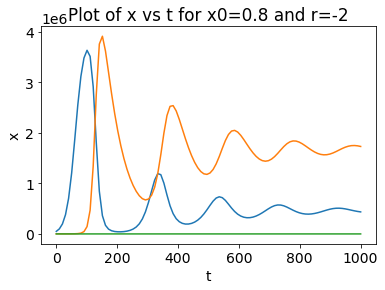

In [38]:
timesteps = np.linspace(0,1000,100) #list of time values 
ic2=[5e4,2500,50]
x = odeint(odefunc2, ic2, timesteps); #solves the differential equation for the given initial condition 
plt.plot(timesteps,x)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Plot of x vs t for x0=0.8 and r=-2' )

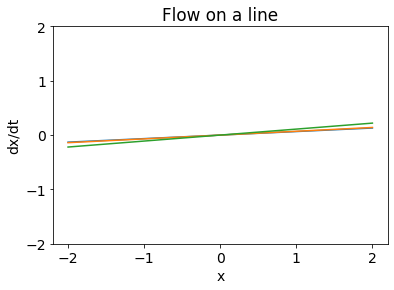

In [43]:
def flowdx(A,mua): #creates a function that finds the value of the differential equation for different x values 
    r=0.07
    K=4e6
    Ad=2
    dAdt=r*A*(1-(A/K))-mua*A*Ad;
    return dAdt #returns the value of the equation at x 



a_vals=np.linspace(-2,2,50) #creates a vector of x values 

mua=[2.5e-3,3.73e-8,-2e-2]
# dA_dt=[]; #creates an empty vector to add in the differential equation values 


for n in mua:
    dA_dt = []
    for i in a_vals: #loops through the x value list and evaluates the equation at this value 
        dA_dt.append(flowdx(i,n))
    plt.rcParams.update({'font.size': 14})  # increase the font size
    plt.xlabel("x")
    plt.ylabel("dx/dt")
    plt.title("Flow on a line")
    plt.ylim(-2, 2) # zoom in as necessary
    plt.plot(a_vals,dA_dt)
    
# print(x_vals)
# print(dx_dt)





0.07117760700627072


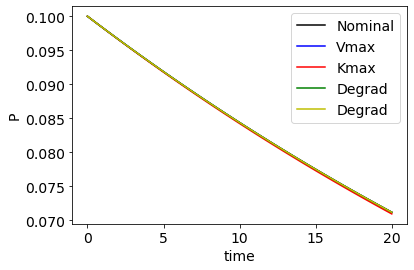

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

from scipy.integrate import odeint

# Define a function which calculates the derivative
def func(x,t, mua,d,K,r):    
    A,Ad = x;
    return [r*A*(1-(A/K))-mua*A*Ad,mua*A*Ad-d*Ad]

    r=0.07
    K=4e6
    mua=3.7e-8
    muac=0.018
    a=2e3
    d=0.017

timesteps = np.linspace(0,20,100)
y0 = [5,0.1];

y = odeint(func, y0, timesteps, args = (3.7e-8,0.017,4e6,0.07))
y1 = odeint(func, y0, timesteps, args = (3.7e-8*1.01,0.017,4e6,0.07))
y2 = odeint(func, y0, timesteps, args = (3.7e-8,0.017*1.01,4e6,0.07))
y3 = odeint(func, y0, timesteps, args = (3.7e-8,0.017,4e6*1.01,0.07))
y4 = odeint(func, y0, timesteps, args = (3.7e-8,0.017,4e6,0.07*1.01))


# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("P")
plt.plot(timesteps, y[:,1],'k', label = "Nominal");
plt.plot(timesteps, y1[:,1],'b', label = "Vmax");
plt.plot(timesteps, y2[:,1],'r', label = "Kmax");
plt.plot(timesteps, y3[:,1],'g', label = "Degrad");
plt.plot(timesteps, y4[:,1],'y', label = "Degrad");
plt.legend()

# PRint the final value of P for our nominal parameter set. This will be needed later.
print(y[-1,1])

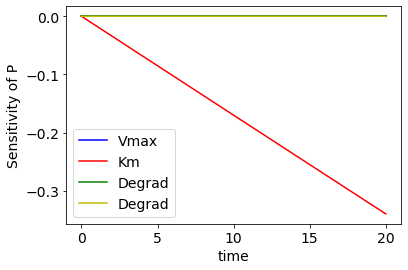

In [17]:
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("Sensitivity of P")
plt.plot(timesteps, ((y1[:,1] - y[:,1])/y[:,1])/0.01,'b', label = "Vmax");
plt.plot(timesteps, ((y2[:,1] - y[:,1])/y[:,1])/0.01,'r', label = "Km");
plt.plot(timesteps,((y3[:,1] - y[:,1])/y[:,1])/0.01,'g', label = "Degrad");
plt.plot(timesteps,((y4[:,1] - y[:,1])/y[:,1])/0.01,'y', label = "Degrad");
plt.legend()

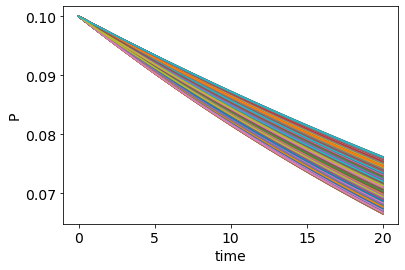

In [19]:
N = 1000;
mua = np.random.uniform(3.7e-8*.8,3.7e-8*1.2,N);
d = np.random.uniform(0.017*.8,0.017*1.2,N);
K = np.random.uniform(4e6*.8,4e6*1.2,N);
r= np.random.uniform(0.07*.8,0.07*1.2,N);

P = np.zeros(N);

for m in np.arange(0,N,1):
    output = odeint(func, y0, timesteps, args = (mua[m],d[m],K[m],r[m]));
    plt.plot(timesteps,output[:,1]);
    plt.xlabel("time");
    plt.ylabel("P");
    P[m]=output[-1,1];

Our fitted equn is y =  -0.00016075268625881725 Vmax +  -0.3401854263657617 Km + 0.00034041325315292 Degradation 4.956297934637002e-06 r


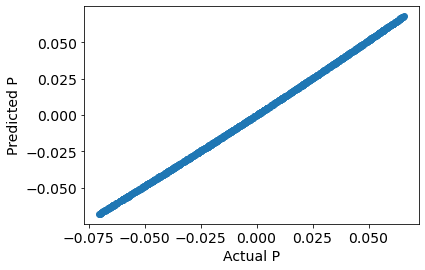

In [21]:
y = (0.07117760700627072-P)/0.07117760700627072; # See first set of code to find this number


# Build our X. Normalize values
X = np.c_[(3.7e-8-mua)/3.7e-8,(0.017-d)/0.017,(4e6-K)/4e6,(0.07-r)/0.07]

# Now can just do the linear least squares estimate
#===================================================

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X));

params = tmp @ np.transpose(X) @ y;
print("Our fitted equn is y = ",params[0], "Vmax + ", params[1], "Km +", params[2],"Degradation",params[3],"r")

plt.plot(y,X @ params,"o");
plt.ylabel("Predicted P");
plt.xlabel("Actual P");
